Predict the loan approval based on specific features. Algorithm used is a decision tree.

In [31]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/content/loan_data.csv')
dataset.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [33]:
df = dataset.drop(['previous_loan_defaults_on_file', 'loan_int_rate', 'cb_person_cred_hist_length'], axis=1)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_percent_income,credit_score,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,0.49,561,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,0.08,504,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,0.44,635,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,0.44,675,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,0.53,586,1


In [34]:
(df == 0).sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,9566
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_percent_income,27
credit_score,0


In [35]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_percent_income,0
credit_score,0


<Axes: xlabel='person_gender', ylabel='count'>

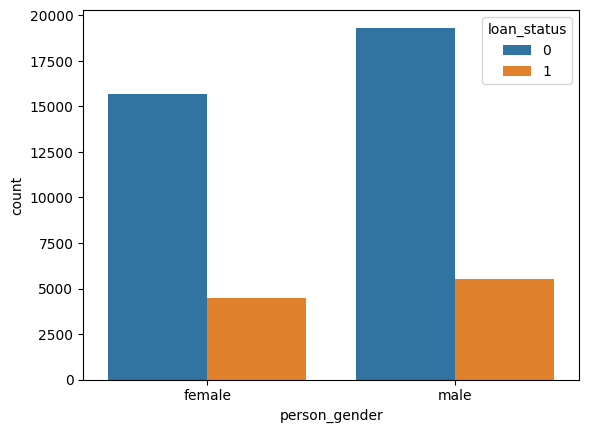

In [36]:
#Count plot between person gender and loan status
sns.countplot(data=df, x='person_gender', hue='loan_status')

<Axes: xlabel='person_education', ylabel='count'>

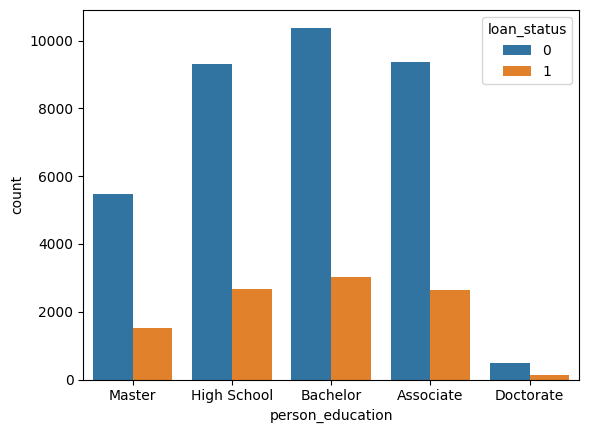

In [37]:
#Count plot between person education and loan status
sns.countplot(data=df, x='person_education', hue='loan_status')

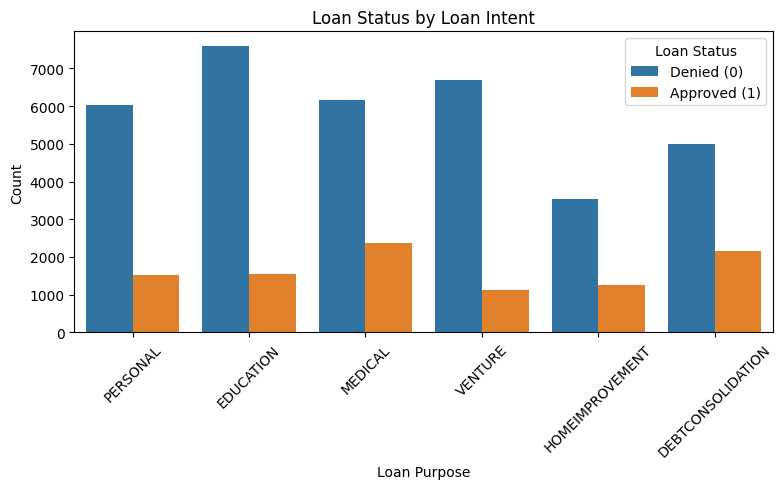

In [38]:
#Count plot between loan intent and loan status
plt.figure(figsize=(8, 5))  # Optional: Resize the plot for clarity
sns.countplot(data=df, x='loan_intent', hue='loan_status')

plt.xlabel("Loan Purpose")  # Rename x-axis label (optional)
plt.ylabel("Count")
plt.title("Loan Status by Loan Intent")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Loan Status", labels=["Denied (0)", "Approved (1)"])
plt.tight_layout()  # Prevent label cutoff
plt.show()

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

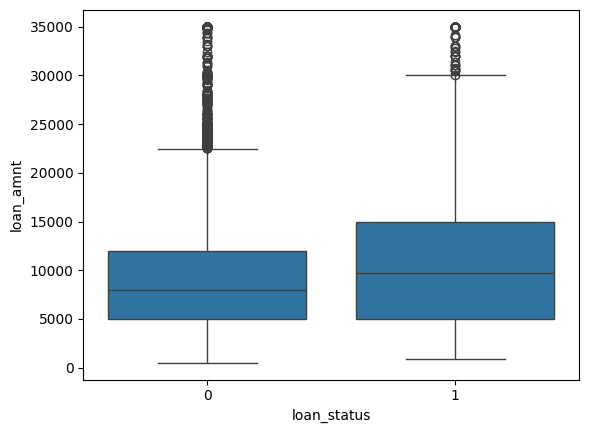

In [39]:
#Boxplot between the loan status and loan amount
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

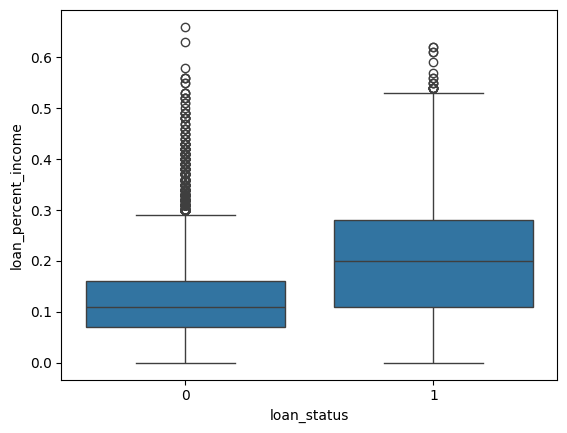

In [40]:
#Boxplot between the loan status and loan percent income
sns.boxplot(data=df, x='loan_status', y='loan_percent_income')

<Axes: xlabel='credit_score', ylabel='Count'>

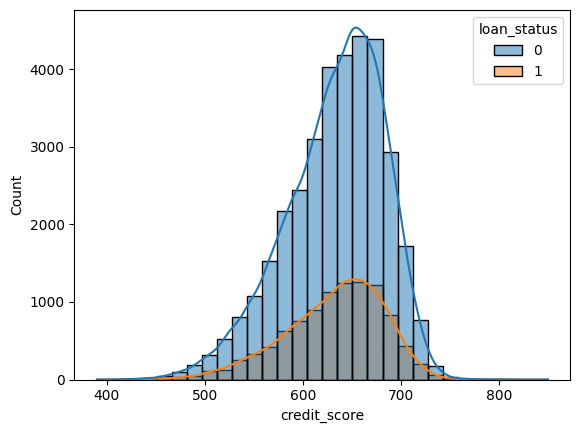

In [41]:
#Histogram between the credit score and the loan status
sns.histplot(data=df, x='credit_score', hue='loan_status', kde=True, bins=30)

In [42]:
#Encode non-numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Loop through non-numeric columns and encode them
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_percent_income,credit_score,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,0.49,561,1
1,21.0,0,3,12282.0,0,2,1000.0,1,0.08,504,0
2,25.0,0,3,12438.0,3,0,5500.0,3,0.44,635,1
3,23.0,0,1,79753.0,0,3,35000.0,3,0.44,675,1
4,24.0,1,4,66135.0,1,3,35000.0,3,0.53,586,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             45000 non-null  float64
 1   person_gender          45000 non-null  int64  
 2   person_education       45000 non-null  int64  
 3   person_income          45000 non-null  float64
 4   person_emp_exp         45000 non-null  int64  
 5   person_home_ownership  45000 non-null  int64  
 6   loan_amnt              45000 non-null  float64
 7   loan_intent            45000 non-null  int64  
 8   loan_percent_income    45000 non-null  float64
 9   credit_score           45000 non-null  int64  
 10  loan_status            45000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.8 MB


<Axes: >

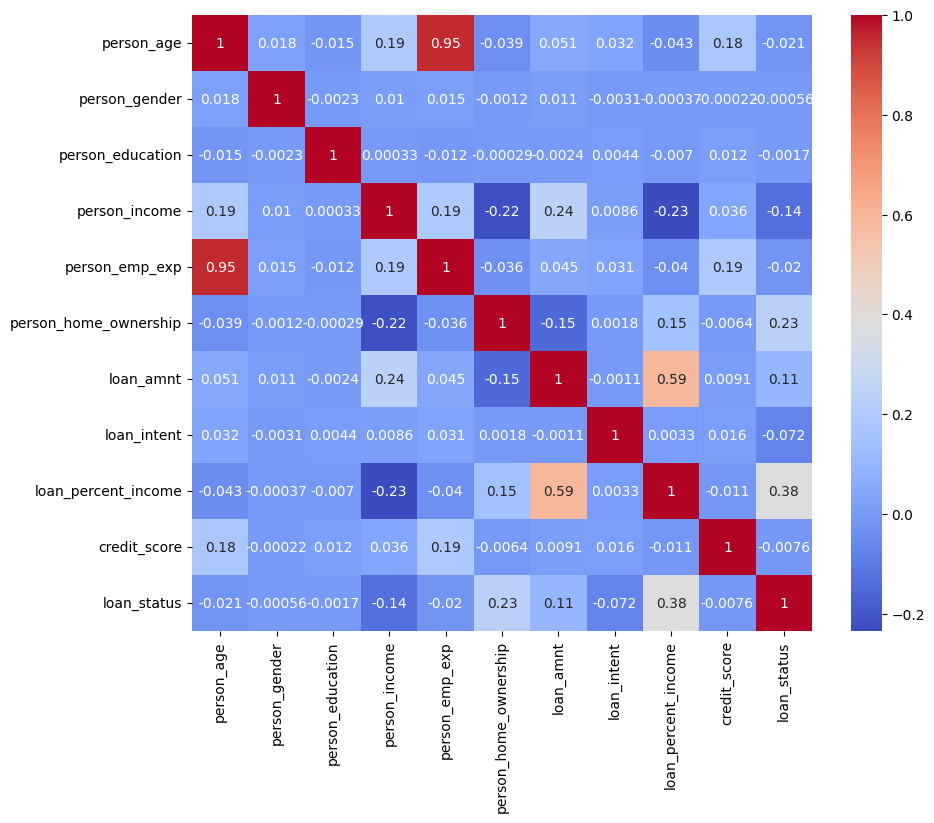

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [48]:
X = df.drop('loan_status', axis=1)
X.head(), X.shape

(   person_age  person_gender  person_education  person_income  person_emp_exp  \
 0        22.0              0                 4        71948.0               0   
 1        21.0              0                 3        12282.0               0   
 2        25.0              0                 3        12438.0               3   
 3        23.0              0                 1        79753.0               0   
 4        24.0              1                 4        66135.0               1   
 
    person_home_ownership  loan_amnt  loan_intent  loan_percent_income  \
 0                      3    35000.0            4                 0.49   
 1                      2     1000.0            1                 0.08   
 2                      0     5500.0            3                 0.44   
 3                      3    35000.0            3                 0.44   
 4                      3    35000.0            3                 0.53   
 
    credit_score  
 0           561  
 1           504  
 2 

In [49]:
y = df['loan_status']
y.head(), y.shape

(0    1
 1    0
 2    1
 3    1
 4    1
 Name: loan_status, dtype: int64,
 (45000,))

In [50]:
#Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [54]:
#Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31500, 10), (13500, 10), (31500,), (13500,))

In [75]:
#train the model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [76]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.866

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10493
           1       0.96      0.41      0.58      3007

    accuracy                           0.87     13500
   macro avg       0.91      0.71      0.75     13500
weighted avg       0.88      0.87      0.84     13500



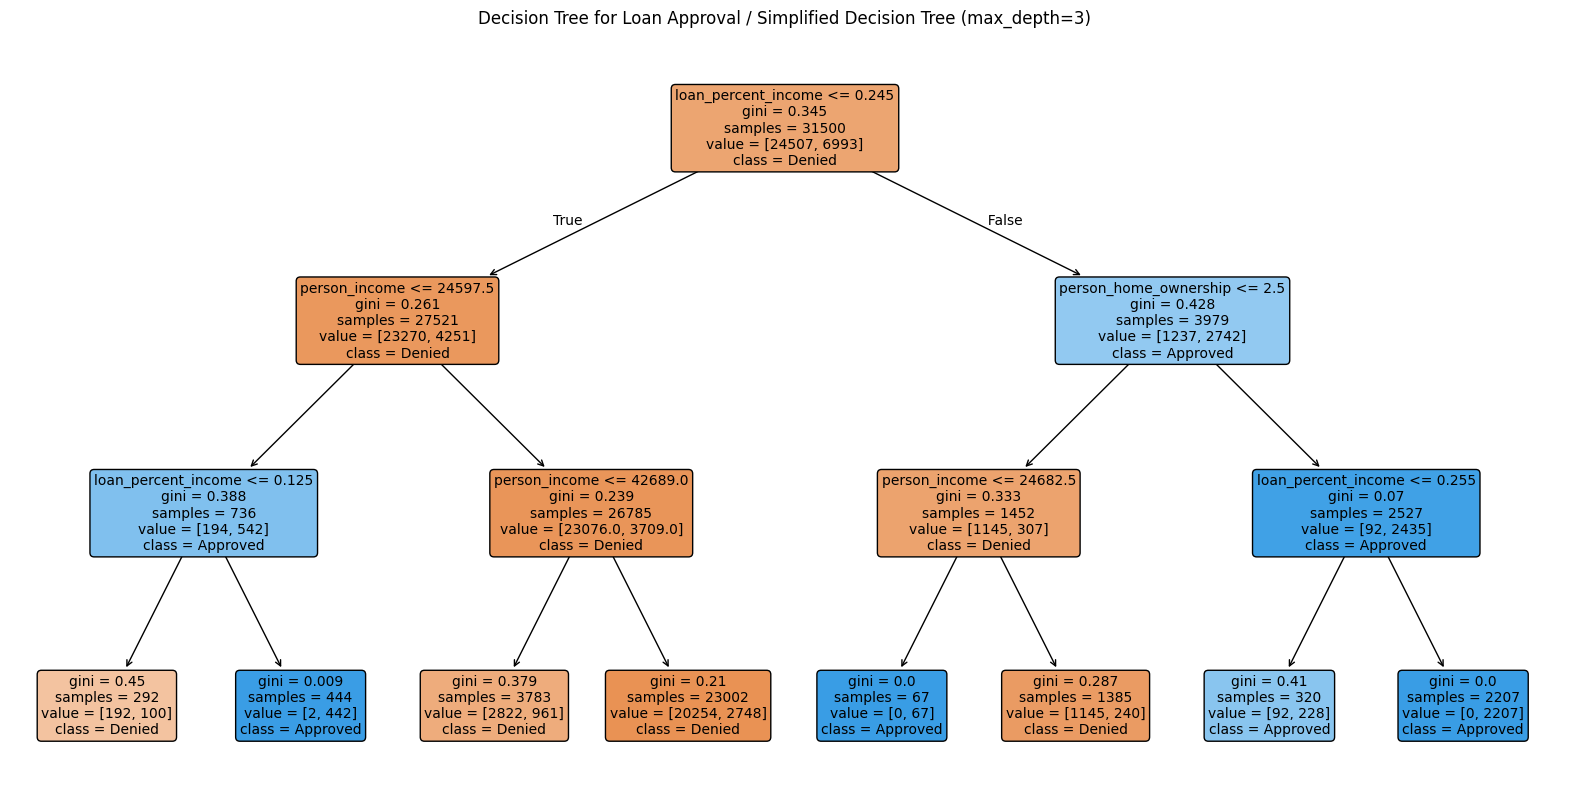

In [78]:
# Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=['Denied', 'Approved'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Decision Tree for Loan Approval / Simplified Decision Tree (max_depth=3)")
plt.show()